## Importing  the necessary packages

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

## Loading  the Dataset

In [2]:
data=pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
data.head() #head() function is used to return top n rows of a data frame or series.Default is first 5 rows of DF

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [3]:
data.tail()#The tail() function is used to return the last n rows.Default is last 5 rows of DF

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
1195                  1  ...                            2   
1196                  2  ...                            1   
1197                  1  ...                            3   
1198                  3  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
1195                       0                     4         No   
1196                       0                     0         No   
1197                       3                     8         No   
1198                       7                     7         No   
1199                       2                     0        Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2  

[5 rows x 28 columns]

In [4]:
data.shape #Shape is a tuple that  gives  the number of rows and columns present in the DF

(1200, 28)

# EXPLORATORY DATA ANALYSIS

In [5]:
data.columns #names of the columns in the data.

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [6]:
data.dtypes # Checking the datatypes of data

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

In [7]:
data.info() # information of all the fields present in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

In [8]:
data.isnull().sum() ## Checking for the null values in the data 

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [9]:
data.isnull().sum().to_frame().any()

0    False
dtype: bool

In [10]:
data.describe() #The describe() function computes a summary of statistics pertaining to the DataFrame columns

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

In [11]:
data.count() #count function returns the count  of how many times a given object has occured  in the list.

EmpNumber                       1200
Age                             1200
Gender                          1200
EducationBackground             1200
MaritalStatus                   1200
EmpDepartment                   1200
EmpJobRole                      1200
BusinessTravelFrequency         1200
DistanceFromHome                1200
EmpEducationLevel               1200
EmpEnvironmentSatisfaction      1200
EmpHourlyRate                   1200
EmpJobInvolvement               1200
EmpJobLevel                     1200
EmpJobSatisfaction              1200
NumCompaniesWorked              1200
OverTime                        1200
EmpLastSalaryHikePercent        1200
EmpRelationshipSatisfaction     1200
TotalWorkExperienceInYears      1200
TrainingTimesLastYear           1200
EmpWorkLifeBalance              1200
ExperienceYearsAtThisCompany    1200
ExperienceYearsInCurrentRole    1200
YearsSinceLastPromotion         1200
YearsWithCurrManager            1200
Attrition                       1200
P

## *--------------------------------------------------------------------------------------------------------------------------*


## 1) Department wise Performance Analysis 

In [12]:
data.groupby('EmpDepartment')['PerformanceRating'].count()

EmpDepartment
Data Science               20
Development               361
Finance                    49
Human Resources            54
Research & Development    343
Sales                     373
Name: PerformanceRating, dtype: int64

In [13]:
data.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

## 1.1) Visualization of  Department wise Performance Analysis

### Performance Rating Analysis of each department

In [14]:
data.groupby(by=['EmpDepartment'])['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

In [15]:
plt.figure(figsize=(20,5))
splot=sns.barplot(data['EmpDepartment'],data['PerformanceRating'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Name of Department ",fontsize=14,color='red')
plt.ylabel(" Performance Rating ",fontsize=14,color='red')
plt.title("Performance Rating v/s Department ",fontdict={'fontsize':22,'color':'black'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [16]:
plt.figure(figsize=(15,5))
splot=sns.pointplot(data['EmpDepartment'],data['PerformanceRating'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Name of Department",fontsize=18,color='red')
plt.ylabel(" Performance Rating of the Department ",fontsize=18,color='red')
plt.title(" Graph of Department v/s Performance Rating ",fontdict={'fontsize':20,'color':'Black'})

Text(0.5, 1.0, ' Graph of Department v/s Performance Rating ')

Performance Rating of '**Development**' Department is the highest and the  '**Finance**' Department is the lowest.

### Analysis of each Department with respect to Performance Rating

In [17]:
dept=pd.get_dummies(data['EmpDepartment'])
ratings=pd.DataFrame(data['PerformanceRating'])

In [18]:
rating_index=pd.concat([dept,ratings],axis=1)
rating_index.head()

Data Science  Development  Finance  Human Resources  \
0             0            0        0                0   
1             0            0        0                0   
2             0            0        0                0   
3             0            0        0                1   
4             0            0        0                0   

   Research & Development  Sales  PerformanceRating  
0                       0      1                  3  
1                       0      1                  3  
2                       0      1                  4  
3                       0      0                  3  
4                       0      1                  3

In [19]:
rating_index.groupby(by=['PerformanceRating'])['Sales'].mean()

PerformanceRating
2    0.448454
3    0.287185
4    0.265152
Name: Sales, dtype: float64

In [20]:
rating_index.groupby(by=['PerformanceRating'])['Development'].mean()

PerformanceRating
2    0.067010
3    0.347826
4    0.333333
Name: Development, dtype: float64

In [21]:
rating_index.groupby(by=['PerformanceRating'])['Research & Development'].mean()

PerformanceRating
2    0.350515
3    0.267735
4    0.310606
Name: Research & Development, dtype: float64

In [22]:
plt.figure(figsize=(18,10))
plt.subplot(1,3,1)
splot=sns.barplot(rating_index['PerformanceRating'],rating_index['Development'],ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

plt.subplot(1,3,2)
splot=sns.barplot(rating_index['PerformanceRating'],rating_index['Sales'],ci=None)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')


plt.subplot(1,3,3)
splot=sns.barplot(rating_index['PerformanceRating'],rating_index['Research & Development'],ci=None)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

plt.show()

PerformanceRating of 2 is highest in **Sales, Research and Development** departments and 3 is highest in **Development** department.

In [23]:
rating_index.groupby(by=['PerformanceRating'])['Human Resources'].mean()

PerformanceRating
2    0.051546
3    0.043478
4    0.045455
Name: Human Resources, dtype: float64

In [24]:
rating_index.groupby(by=['PerformanceRating'])['Finance'].mean()

PerformanceRating
2    0.077320
3    0.034325
4    0.030303
Name: Finance, dtype: float64

In [25]:
rating_index.groupby(by=['PerformanceRating'])['Data Science'].mean()

PerformanceRating
2    0.005155
3    0.019451
4    0.015152
Name: Data Science, dtype: float64

In [26]:
plt.figure(figsize=(19,9))
plt.subplot(1,3,1)
splot=sns.barplot(rating_index['PerformanceRating'],rating_index['Data Science'],ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

plt.subplot(1,3,2)
splot=sns.barplot(rating_index['PerformanceRating'],rating_index['Finance'],ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

plt.subplot(1,3,3)
splot=sns.barplot(rating_index['PerformanceRating'],rating_index['Human Resources'],ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')
 
plt.show()

PerformanceRating 2 is highest in **Human Resources, Finance** departments.
PerformanceRating 3 is highest in **Data Science** department.
PerformanceRating 4 is 2nd highest in **Development, Research and Development, Human Resources and Data Science** departments.

## 2) Top 3 important factors effecting the employee performance

In [27]:
performance1=pd.DataFrame(data,columns=['Age','Gender','BusinessTravelFrequency','DistanceFromHome','EmpEducationLevel','EmpEnvironmentSatisfaction','EmpHourlyRate','EmpJobInvolvement',
                                      'EmpJobLevel','EmpJobSatisfaction','OverTime','EmpLastSalaryHikePercent','NumCompaniesWorked',
                                              'EmpRelationshipSatisfaction','TrainingTimesLastYear','EmpWorkLifeBalance',
                                               'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion',
                                              'YearsWithCurrManager','Attrition','PerformanceRating'])
performance1.head()

Age Gender BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0   32   Male           Travel_Rarely                10                  3   
1   47   Male           Travel_Rarely                14                  4   
2   40   Male       Travel_Frequently                 5                  4   
3   41   Male           Travel_Rarely                10                  4   
4   60   Male           Travel_Rarely                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  ... NumCompaniesWorked  EmpRelationshipSatisfaction  \
0                   4  ...                  1                            4   
1                   1  ...                  2                            4   
2                   1  ...                  5                            3   
3                   4  ...                  3                            2   
4                   1  ...                  8                            4   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                       12   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8         No                  3  
1                     7         No                  3  
2                    12         No                  4  
3                     6         No                  3  
4                     2         No                  3  

[5 rows x 22 columns]

In [28]:
performance1.tail()

Age  Gender BusinessTravelFrequency  DistanceFromHome  \
1195   27  Female       Travel_Frequently                 3   
1196   37    Male           Travel_Rarely                10   
1197   50    Male           Travel_Rarely                28   
1198   34  Female           Travel_Rarely                 9   
1199   24  Female           Travel_Rarely                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
1195                  1                           4             71   
1196                  2                           4             80   
1197                  1                           4             74   
1198                  3                           4             46   
1199                  2                           1             65   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  ...  \
1195                  4            2                   4  ...   
1196                  4            1                   4  ...   
1197                  4            1                   3  ...   
1198                  2            3                   2  ...   
1199                  3            2                   3  ...   

     NumCompaniesWorked  EmpRelationshipSatisfaction  TrainingTimesLastYear  \
1195                  1                            2                      3   
1196                  3                            1                      2   
1197                  1                            3                      3   
1198                  1                            2                      3   
1199                  9                            1                      3   

      EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
1195                   3                             6   
1196                   3                             1   
1197                   3                            20   
1198                   4                             8   
1199                   3                             2   

      ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
1195                             5                        0   
1196                             0                        0   
1197                             8                        3   
1198                             7                        7   
1199                             2                        2   

      YearsWithCurrManager  Attrition  PerformanceRating  
1195                     4         No                  4  
1196                     0         No                  3  
1197                     8         No                  3  
1198                     7         No                  3  
1199                     0        Yes                  2  

[5 rows x 22 columns]

In [29]:
performance1.groupby('PerformanceRating').mean()

Age  DistanceFromHome  EmpEducationLevel  \
PerformanceRating                                                   
2                  37.804124          9.835052           2.829897   
3                  36.784897          9.137300           2.905034   
4                  36.500000          8.371212           2.901515   

                   EmpEnvironmentSatisfaction  EmpHourlyRate  \
PerformanceRating                                              
2                                    1.582474      68.216495   
3                                    2.911899      65.609840   
4                                    3.083333      65.159091   

                   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  \
PerformanceRating                                                       
2                           2.716495     2.304124            2.752577   
3                           2.743707     2.022883            2.723112   
4                           2.674242     2.015152            2.765152   

                   EmpLastSalaryHikePercent  NumCompaniesWorked  \
PerformanceRating                                                 
2                                 15.072165            2.572165   
3                                 14.427918            2.669336   
4                                 20.704545            2.772727   

                   EmpRelationshipSatisfaction  TrainingTimesLastYear  \
PerformanceRating                                                       
2                                     2.737113               2.757732   
3                                     2.734554               2.803204   
4                                     2.643939               2.712121   

                   EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
PerformanceRating                                                     
2                            2.634021                      9.097938   
3                            2.731121                      6.676201   
4                            2.992424                      6.765152   

                   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
PerformanceRating                                                          
2                                      5.788660                 3.695876   
3                                      4.006865                 1.911899   
4                                      3.977273                 1.856061   

                   YearsWithCurrManager  
PerformanceRating                        
2                              5.350515  
3                              3.860412  
4                              3.893939

## Visualization carried out for different factors affecting Employee Performance

## 2.1) Performance Rating based on EmpJobInvolvement

In [30]:
performance1.groupby(by=['EmpJobInvolvement'])['PerformanceRating'].mean()

EmpJobInvolvement
1    2.957143
2    2.959184
3    2.943370
4    2.946429
Name: PerformanceRating, dtype: float64

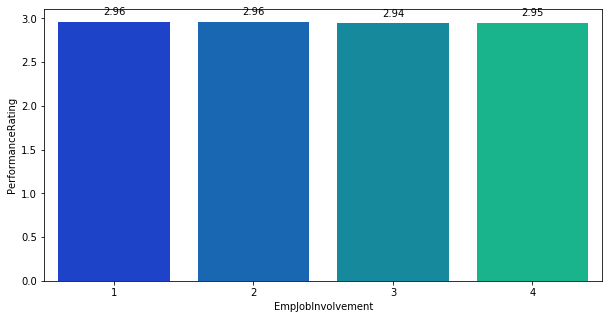

In [31]:
plt.figure(figsize=(10,5))
splot=sns.barplot(performance1['EmpJobInvolvement'], performance1['PerformanceRating'],palette ="winter",ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Here Employees Job Involvement level 2 performed better. `

## 2.2) Performance Rating based on Employee EducationLevel

In [32]:
performance1.groupby(by=['EmpEducationLevel'])['PerformanceRating'].mean()

EmpEducationLevel
1    2.871622
2    2.949791
3    2.986637
4    2.937888
5    2.880952
Name: PerformanceRating, dtype: float64

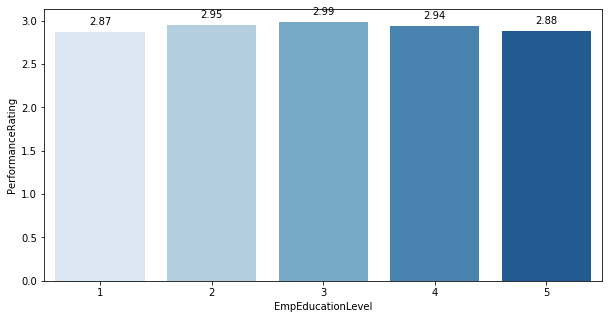

In [33]:
plt.figure(figsize=(10,5))
splot=sns.barplot(performance1['EmpEducationLevel'], performance1['PerformanceRating'],palette ="Blues",ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

 Employees having education level 3 is the highest.

## 2.3) Performance Rating based on DistanceFromHome

In [34]:
performance1.groupby(by=['DistanceFromHome'])['PerformanceRating'].mean()

DistanceFromHome
1     2.958824
2     2.956522
3     3.029851
4     2.980392
5     2.925926
6     2.934783
7     3.000000
8     2.942029
9     2.893939
10    3.000000
11    3.040000
12    2.937500
13    2.857143
14    2.941176
15    2.764706
16    3.160000
17    3.000000
18    2.750000
19    2.944444
20    2.789474
21    2.933333
22    2.823529
23    2.909091
24    2.913043
25    3.000000
26    2.909091
27    3.000000
28    2.900000
29    2.826087
Name: PerformanceRating, dtype: float64

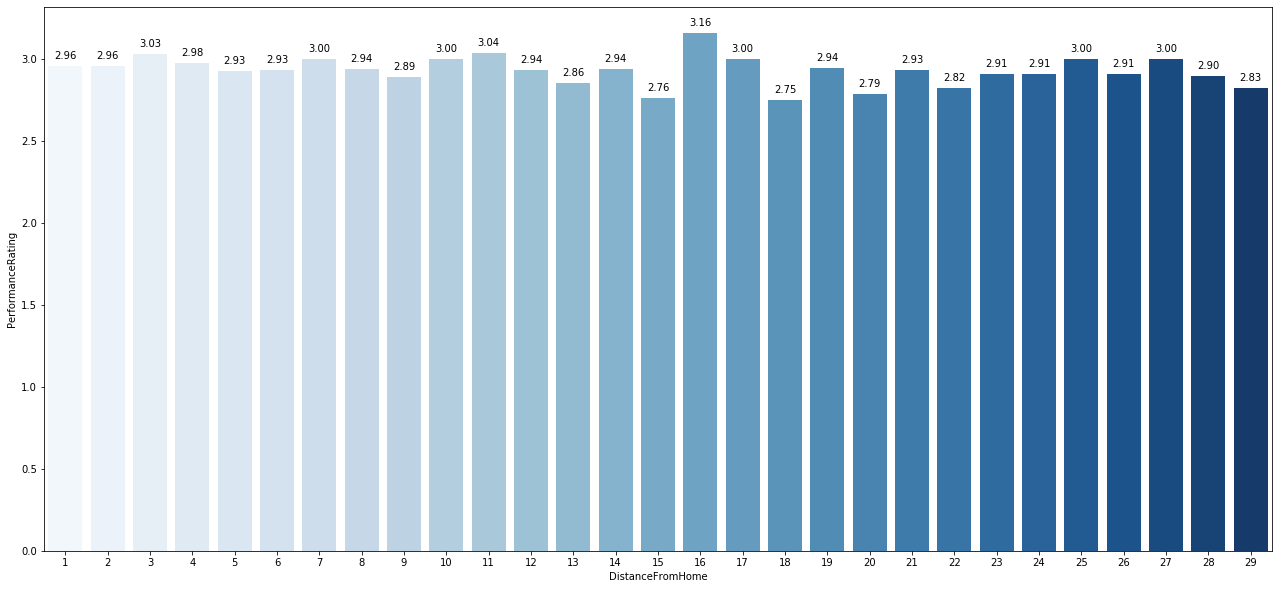

In [35]:
plt.figure(figsize=(22,10))
splot=sns.barplot(performance1['DistanceFromHome'], performance1['PerformanceRating'],palette ="Blues",ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

 Employees staying 16km away from home performed better.

## 2.4) Performance Rating based on BusinessTravelFrequency

In [36]:
performance1.groupby(by=['BusinessTravelFrequency'])['PerformanceRating'].mean()

BusinessTravelFrequency
Non-Travel           2.977273
Travel_Frequently    2.972973
Travel_Rarely        2.937352
Name: PerformanceRating, dtype: float64

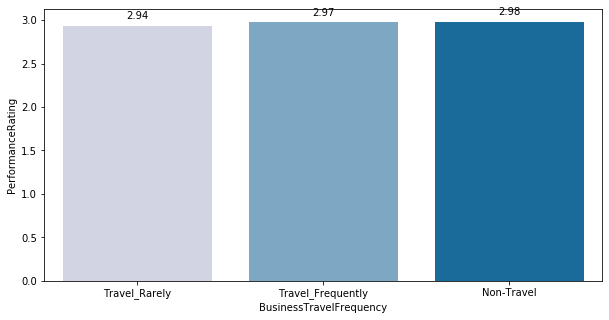

In [37]:
plt.figure(figsize=(10,5))
splot=sns.barplot(performance1['BusinessTravelFrequency'],performance1['PerformanceRating'],palette ="PuBu",ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Here in terms of BusinessTravelFrequency , '**Non-Travel**' employees performed better.

## 2.5) Performance Rating based on Employee EnvironmentSatisfaction

In [38]:
performance1.groupby(by=['EmpEnvironmentSatisfaction'])['PerformanceRating'].mean()

EmpEnvironmentSatisfaction
1    2.665217
2    2.652893
3    3.138965
4    3.132964
Name: PerformanceRating, dtype: float64

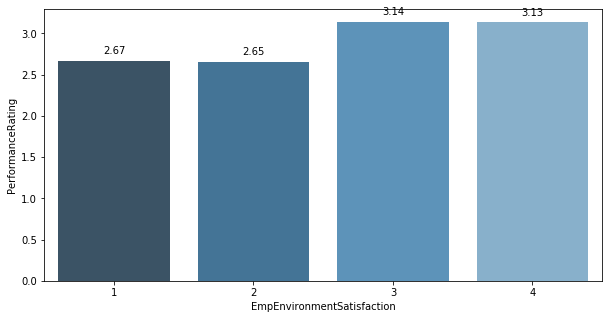

In [39]:
plt.figure(figsize=(10,5))
splot=sns.barplot(performance1['EmpEnvironmentSatisfaction'], performance1['PerformanceRating'],palette ="Blues_d",ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

 Environment Satisfaction **Level 3** performed better.

## 2.6) Performance Rating based on EmpLastSalaryHikePercent

In [40]:
performance1.groupby(by=['EmpLastSalaryHikePercent'])['PerformanceRating'].mean()

EmpLastSalaryHikePercent
11    2.840237
12    2.819355
13    2.857143
14    2.860465
15    2.914634
16    2.852941
17    2.910448
18    2.863014
19    2.873016
20    3.360000
21    3.588235
22    3.425532
23    3.523810
24    3.500000
25    3.307692
Name: PerformanceRating, dtype: float64

In [41]:
plt.figure(figsize=(10,5))
splot=sns.barplot(performance1['EmpLastSalaryHikePercent'], performance1['PerformanceRating'],palette ="RdPu",ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Here employees who received 21% hike in the salary has better performance.

## 2.7) Performance Rating based on NumCompaniesWorked

In [42]:
performance1.groupby(by=['NumCompaniesWorked'])['PerformanceRating'].mean()

NumCompaniesWorked
0    2.897436
1    2.942263
2    2.910569
3    2.962406
4    3.084112
5    2.962264
6    2.982143
7    2.950000
8    2.950000
9    2.846154
Name: PerformanceRating, dtype: float64

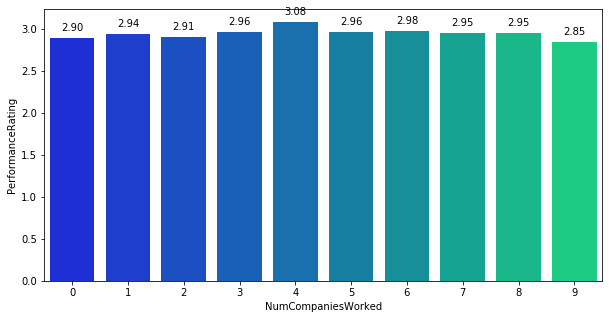

In [43]:
plt.figure(figsize=(10,5))
splot=sns.barplot(performance1['NumCompaniesWorked'], performance1['PerformanceRating'],palette ="winter",ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Here employees who worked in 4 different companies performed better in their job.

## 2.8) Performance Rating based on EmpJobSatisfaction

In [44]:
performance1.groupby(by=['EmpJobSatisfaction'])['PerformanceRating'].mean()

EmpJobSatisfaction
1    2.969697
2    2.953586
3    2.898305
4    2.978836
Name: PerformanceRating, dtype: float64

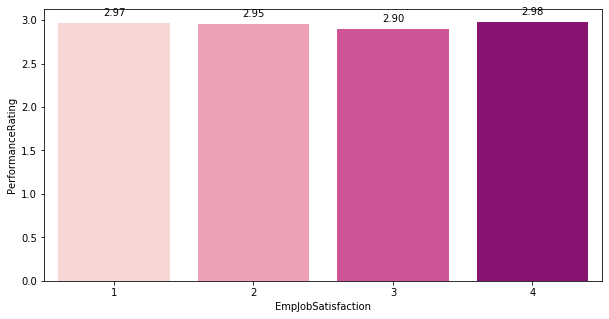

In [45]:
plt.figure(figsize=(10,5))
splot=sns.barplot(performance1['EmpJobSatisfaction'], performance1['PerformanceRating'],palette ="RdPu",ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Here Employee Job Satisfaction level 4 performed better.

## 2.9) Performance Rating based on EmpJobLevel

In [46]:
performance1.groupby(by=['EmpJobLevel'])['PerformanceRating'].mean()

EmpJobLevel
1    2.993182
2    2.947846
3    2.890173
4    2.888889
5    2.875000
Name: PerformanceRating, dtype: float64

In [47]:
plt.figure(figsize=(10,5))
splot=sns.barplot(performance1['EmpJobLevel'], performance1['PerformanceRating'],palette ="BuPu",ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Employee Job Level 1 performed better.

## 2.10) Performance Rating based on OverTime


In [48]:
performance1.groupby(by=['OverTime'])['PerformanceRating'].mean()

OverTime
No     2.931523
Yes    2.988669
Name: PerformanceRating, dtype: float64

In [49]:
plt.figure(figsize=(10,5))
splot=sns.barplot(performance1['OverTime'], performance1['PerformanceRating'],palette ="PuBu",ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Employees working overtime performed better.

## 2.11) Performance Rating based on EmpWorkLifeBalance

In [50]:
performance1.groupby(by=['EmpWorkLifeBalance'])['PerformanceRating'].mean()

EmpWorkLifeBalance
1    2.750000
2    2.918367
3    2.950481
4    3.121739
Name: PerformanceRating, dtype: float64

In [51]:
plt.figure(figsize=(10,5))
splot=sns.barplot(performance1['EmpWorkLifeBalance'], performance1['PerformanceRating'],palette ="plasma",ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Here employees having Worklife Balance level 4 has highest performance rating.

## 2.12) Performance Rating based on ExperienceYearsInCurrentRole

In [52]:
performance1.groupby(by=['ExperienceYearsInCurrentRole'])['PerformanceRating'].mean()


ExperienceYearsInCurrentRole
0     3.168421
1     3.086957
2     2.887789
3     2.934579
4     2.956522
5     3.137931
6     3.033333
7     2.920455
8     2.769231
9     2.746032
10    2.760000
11    3.055556
12    3.285714
13    3.200000
14    2.600000
15    3.250000
16    2.285714
17    2.666667
18    3.000000
Name: PerformanceRating, dtype: float64

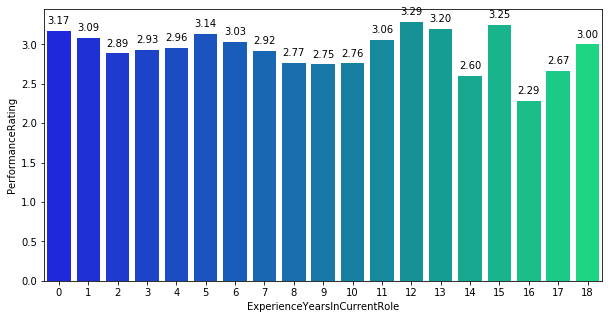

In [53]:
plt.figure(figsize=(10,5))
splot=sns.barplot(performance1['ExperienceYearsInCurrentRole'], performance1['PerformanceRating'],palette ="winter",ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Here employees having 12 years of experience in the current role performed better.

## 2.13) Performance Rating based on ExperienceYearsAtThisCompany


In [54]:
performance1.groupby(by=['ExperienceYearsAtThisCompany'])['PerformanceRating'].mean()

ExperienceYearsAtThisCompany
0     3.166667
1     3.173913
2     2.728972
3     2.990476
4     2.863636
5     3.052632
6     3.060606
7     2.958904
8     3.031746
9     2.893939
10    2.810000
11    2.888889
12    2.714286
13    2.888889
14    2.714286
15    2.705882
16    3.000000
17    3.000000
18    2.727273
19    2.818182
20    2.809524
21    2.714286
22    2.916667
23    4.000000
24    2.333333
25    2.500000
26    3.500000
27    3.000000
29    3.500000
30    2.000000
31    3.000000
32    2.333333
33    2.800000
34    4.000000
36    3.500000
37    3.000000
40    3.000000
Name: PerformanceRating, dtype: float64

In [55]:
plt.figure(figsize=(20,10))
splot=sns.barplot(performance1['ExperienceYearsAtThisCompany'], performance1['PerformanceRating'],palette ="jet_r",ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Employees of experience 23 an 34  have the highest performance rating

## 2.14) Performance Rating based on Employee RelationshipSatisfaction

In [56]:
performance1.groupby(by=['EmpRelationshipSatisfaction'])['PerformanceRating'].mean()

EmpRelationshipSatisfaction
1    2.949772
2    2.955466
3    2.970976
4    2.918310
Name: PerformanceRating, dtype: float64

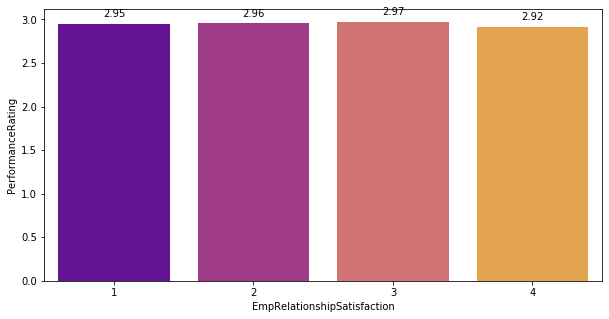

In [57]:
plt.figure(figsize=(10,5))
splot=sns.barplot(performance1['EmpRelationshipSatisfaction'], performance1['PerformanceRating'],palette ="plasma",ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Here employee having Relationship Satisfaction level 3 has performed better. 

## 2.15) Performance Rating based on TrainingTimesLastYear

In [58]:
performance1.groupby(by=['TrainingTimesLastYear'])['PerformanceRating'].mean()

TrainingTimesLastYear
0    2.863636
1    2.946429
2    2.948315
3    2.975787
4    2.918367
5    2.938776
6    2.869565
Name: PerformanceRating, dtype: float64

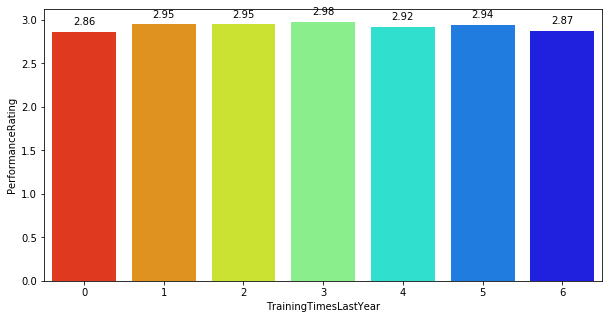

In [59]:
plt.figure(figsize=(10,5))
splot=sns.barplot(performance1['TrainingTimesLastYear'], performance1['PerformanceRating'],palette ="jet_r",ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Here employees who have been trained 3 times last year have performed better.

## 2.16) Performance Rating based on EmpHourlyRate

In [60]:
performance1.groupby(by=['EmpHourlyRate'])['PerformanceRating'].mean()

EmpHourlyRate
30     3.153846
31     2.769231
32     3.000000
33     2.937500
34     2.833333
         ...   
96     2.909091
97     2.944444
98     2.800000
99     2.684211
100    2.928571
Name: PerformanceRating, Length: 71, dtype: float64

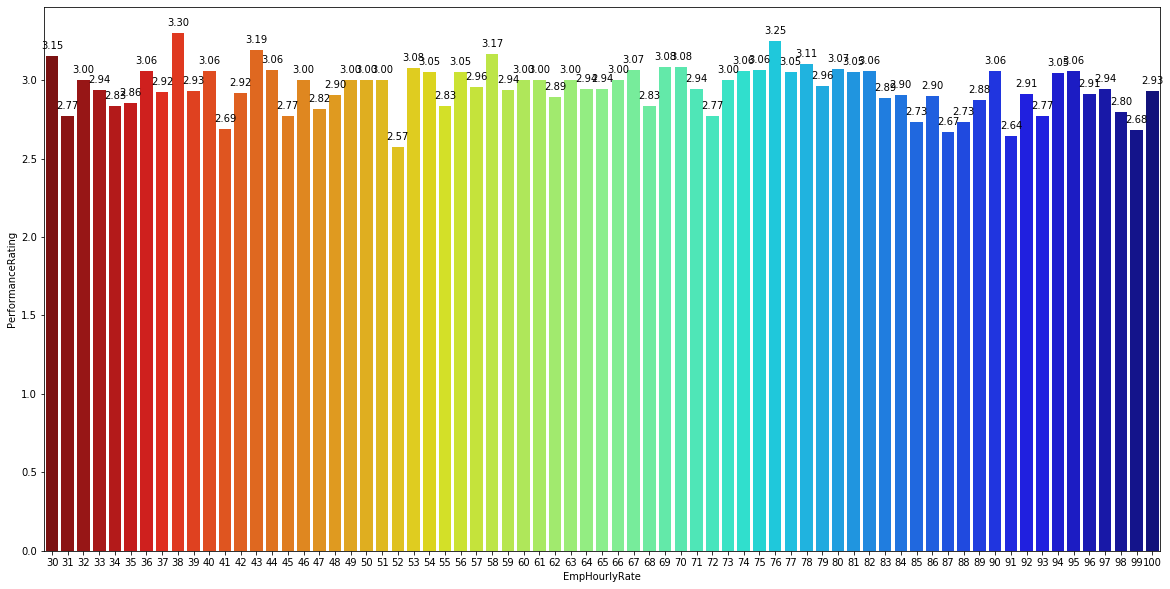

In [61]:
plt.figure(figsize=(20,10))
splot=sns.barplot(performance1['EmpHourlyRate'], performance1['PerformanceRating'],palette ="jet_r",ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Here employees working at the rate of 38 hours have performed better.

## 2.17) Performance Rating based on Attrition

In [62]:
performance1.groupby(by=['Attrition'])['PerformanceRating'].mean()

Attrition
No     2.956947
Yes    2.898876
Name: PerformanceRating, dtype: float64

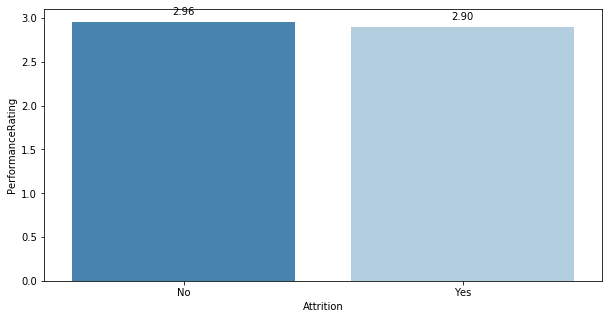

In [63]:
plt.figure(figsize=(10,5))
splot=sns.barplot(performance1['Attrition'], performance1['PerformanceRating'],palette ="Blues_r",ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Here employees who haven't resigned from many jobs have performed better.

## 2.18) Performance Rating based on Gender

In [64]:
performance1.groupby(by=['Gender'])['PerformanceRating'].mean()

Gender
Female    2.949474
Male      2.947586
Name: PerformanceRating, dtype: float64

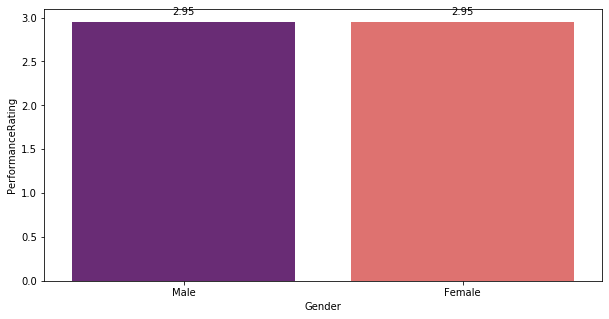

In [65]:
plt.figure(figsize=(10,5))
splot=sns.barplot(performance1['Gender'], performance1['PerformanceRating'],palette ="magma",ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Females performed better than males.

## 2.19) Performance Rating based on YearsWithCurrManager


In [66]:
performance1.groupby(by=['YearsWithCurrManager'])['PerformanceRating'].mean()

YearsWithCurrManager
0     3.134884
1     2.910448
2     2.882562
3     2.951456
4     3.094118
5     2.961538
6     2.892857
7     2.909091
8     2.850575
9     2.886792
10    2.636364
11    3.000000
12    2.642857
13    2.700000
14    2.500000
15    3.000000
16    3.000000
17    3.166667
Name: PerformanceRating, dtype: float64

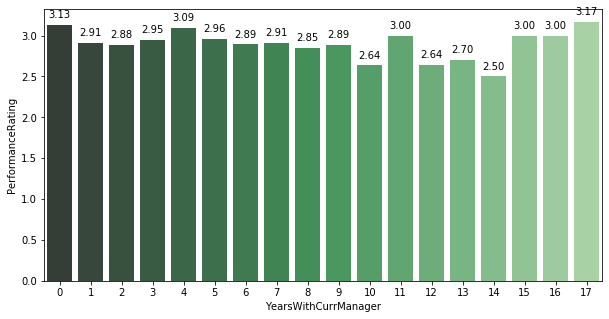

In [67]:
plt.figure(figsize=(10,5))
splot=sns.barplot(performance1['YearsWithCurrManager'], performance1['PerformanceRating'],palette ="Greens_d",ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Employees who spent 17 years with the current manager has better performance rating.

## 2.20) Performance Rating based on YearsSinceLastPromotion

In [68]:
performance1.groupby(by=['YearsSinceLastPromotion'])['PerformanceRating'].mean()

YearsSinceLastPromotion
0     3.123667
1     2.898990
2     2.763780
3     2.777778
4     2.773585
5     2.828571
6     2.833333
7     2.854839
8     2.545455
9     2.687500
10    2.600000
11    2.826087
12    2.666667
13    3.125000
14    3.000000
15    2.909091
Name: PerformanceRating, dtype: float64

In [69]:
plt.figure(figsize=(10,5))
splot=sns.barplot(performance1['YearsSinceLastPromotion'], performance1['PerformanceRating'],palette ="winter",ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Here employees who haven't been promoted since 13 years after their last promotion have performed better.

## Correlation Matrix 

In [70]:
#It is a table showing correlation coefficients between variables. 
#Each cell in the table shows the correlation between two variables

In [71]:
corr=data.corr()
corr

Age  DistanceFromHome  EmpEducationLevel  \
Age                           1.000000          0.020937           0.207313   
DistanceFromHome              0.020937          1.000000           0.045856   
EmpEducationLevel             0.207313          0.045856           1.000000   
EmpEnvironmentSatisfaction    0.013814         -0.017719          -0.037103   
EmpHourlyRate                 0.062867          0.013730           0.014095   
EmpJobInvolvement             0.027216          0.003231           0.027544   
EmpJobLevel                   0.509139          0.017270           0.100734   
EmpJobSatisfaction           -0.002436         -0.003036           0.000357   
NumCompaniesWorked            0.284408         -0.021411           0.128674   
EmpLastSalaryHikePercent     -0.006105          0.044974           0.002358   
EmpRelationshipSatisfaction   0.049749         -0.009509          -0.016690   
TotalWorkExperienceInYears    0.680886          0.027306           0.151062   
TrainingTimesLastYear        -0.016053         -0.032082          -0.013674   
EmpWorkLifeBalance           -0.019563         -0.044788           0.010276   
ExperienceYearsAtThisCompany  0.318852          0.021908           0.076332   
ExperienceYearsInCurrentRole  0.217163          0.019898           0.066672   
YearsSinceLastPromotion       0.228199          0.013246           0.054313   
YearsWithCurrManager          0.205098          0.017860           0.088988   
PerformanceRating            -0.040164         -0.046142           0.020529   

                              EmpEnvironmentSatisfaction  EmpHourlyRate  \
Age                                             0.013814       0.062867   
DistanceFromHome                               -0.017719       0.013730   
EmpEducationLevel                              -0.037103       0.014095   
EmpEnvironmentSatisfaction                      1.000000      -0.049501   
EmpHourlyRate                                  -0.049501       1.000000   
EmpJobInvolvement                               0.004865       0.054741   
EmpJobLevel                                    -0.008272      -0.018606   
EmpJobSatisfaction                             -0.004319      -0.066417   
NumCompaniesWorked                              0.017270       0.040484   
EmpLastSalaryHikePercent                       -0.047271      -0.015934   
EmpRelationshipSatisfaction                    -0.010504       0.008783   
TotalWorkExperienceInYears                     -0.012894       0.026034   
TrainingTimesLastYear                           0.001192      -0.024160   
EmpWorkLifeBalance                             -0.000262       0.016189   
ExperienceYearsAtThisCompany                   -0.000561      -0.000399   
ExperienceYearsInCurrentRole                    0.025491      -0.011871   
YearsSinceLastPromotion                         0.010732      -0.010000   
YearsWithCurrManager                           -0.011702      -0.004576   
PerformanceRating                               0.395561      -0.043116   

                              EmpJobInvolvement  EmpJobLevel  \
Age                                    0.027216     0.509139   
DistanceFromHome                       0.003231     0.017270   
EmpEducationLevel                      0.027544     0.100734   
EmpEnvironmentSatisfaction             0.004865    -0.008272   
EmpHourlyRate                          0.054741    -0.018606   
EmpJobInvolvement                      1.000000    -0.034349   
EmpJobLevel                           -0.034349     1.000000   
EmpJobSatisfaction                    -0.005501    -0.011853   
NumCompaniesWorked                     0.018211     0.127477   
EmpLastSalaryHikePercent              -0.001742    -0.020975   
EmpRelationshipSatisfaction            0.018037     0.002992   
TotalWorkExperienceInYears            -0.028851     0.784229   
TrainingTimesLastYear                 -0.025168    -0.000389   
EmpWorkLifeBalance                    -0.014129     0.049

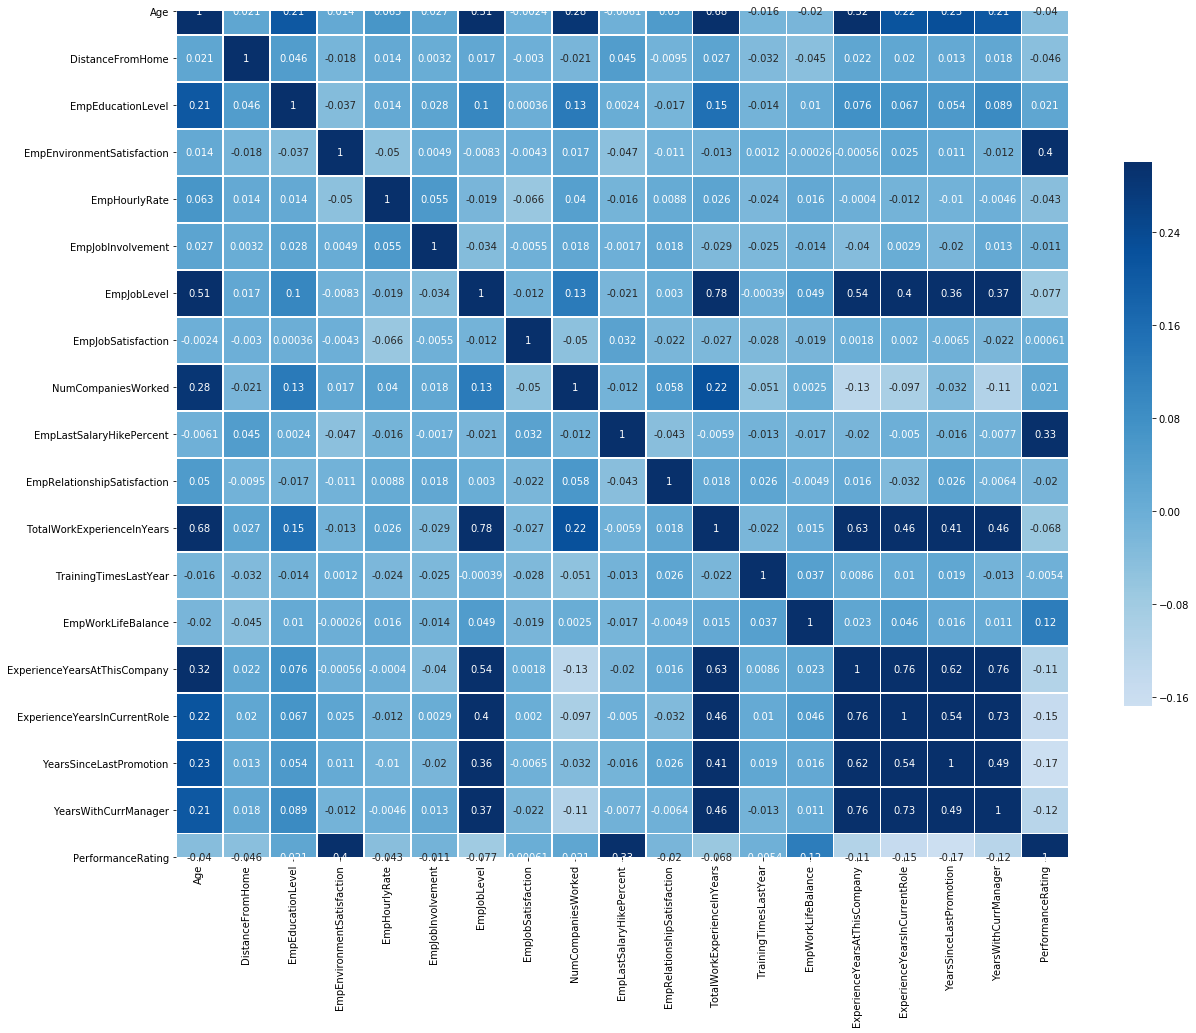

In [72]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='Blues', vmax=.3, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5}, annot=True)

From the  visulisation and corelation matrix ,we can clearly indicate that the top 3 factors affecting the employee performance are
>   1: Employee Environment Satisfation  --> 39.55%

>   2: Employee Last Salary Hike Percent --> 33.37%

>   3: Years Since Last Promotion --> 16.76%

## Checking for the outliers

In [73]:
plt.figure(figsize=(25,25))
data[['NumCompaniesWorked','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
            'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].boxplot();

**POINT** : Here more outliers are present in the fields TotalWorkExperienceInYears, ExperienceYearsAtThisCompany, YearsSinceLastPromotion. So we only remove them from these fields. The other fields will remain as it is.

## Removing outliers for YearsSinceLastPromotion


1026/1200 data points remain


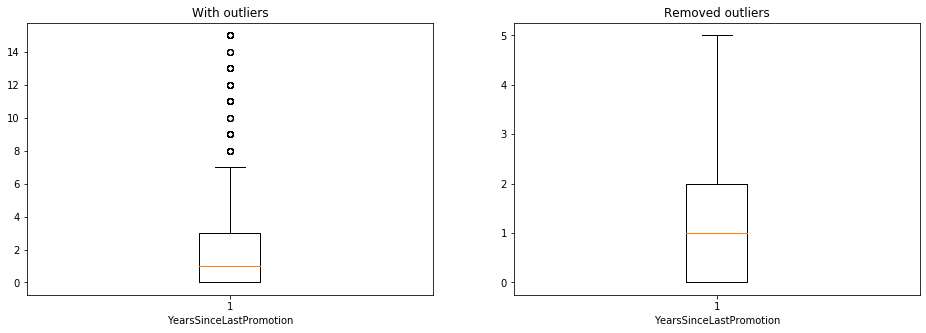

In [74]:
X=data.YearsSinceLastPromotion
removed_outliers_YearsSinceLastPromotion = X.between(X.quantile(0.09),X.quantile(0.85))
print(str(X[removed_outliers_YearsSinceLastPromotion].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_YearsSinceLastPromotion]);
plt.xlabel("YearsSinceLastPromotion")
figure,axis=plt.subplots(1,2,figsize=(16,5))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_YearsSinceLastPromotion]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("YearsSinceLastPromotion")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("YearsSinceLastPromotion")

data['clean_YearsSinceLastPromotion']=X[removed_outliers_YearsSinceLastPromotion]

## Removing outliers for ExperienceYearsAtThisCompany

985/1200 data points remain


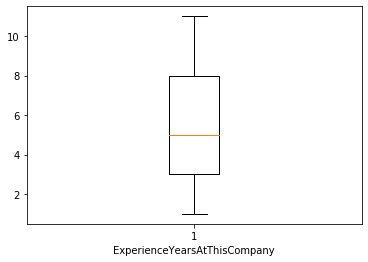

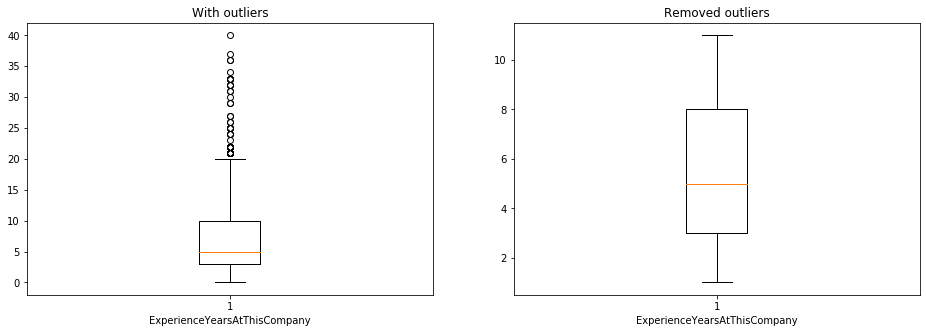

In [75]:
X=data.ExperienceYearsAtThisCompany
removed_outliers_ExperienceYearsAtThisCompany = X.between(X.quantile(0.05),X.quantile(0.85))
print(str(X[removed_outliers_ExperienceYearsAtThisCompany].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_ExperienceYearsAtThisCompany]);
plt.xlabel("ExperienceYearsAtThisCompany")
figure,axis=plt.subplots(1,2,figsize=(16,5))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_ExperienceYearsAtThisCompany]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("ExperienceYearsAtThisCompany")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("ExperienceYearsAtThisCompany")

data['clean_ExperienceYearsAtThisCompany']=X[removed_outliers_ExperienceYearsAtThisCompany]

## Removing outliers for TotalWorkExperienceInYears

1082/1200 data points remain


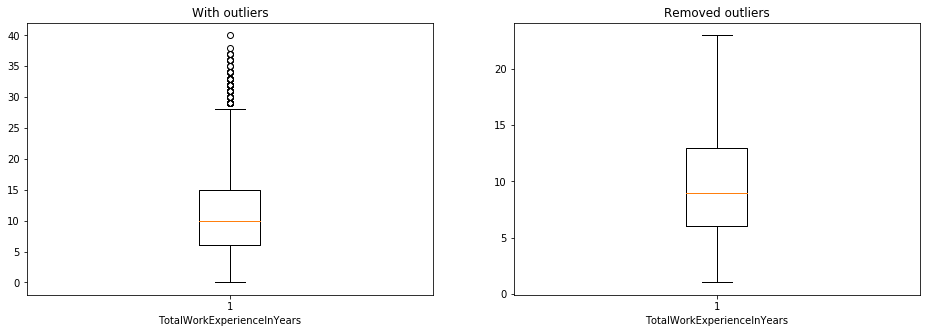

In [76]:
X=data.TotalWorkExperienceInYears
removed_outliers_TotalWorkExperienceInYears = X.between(X.quantile(0.01),X.quantile(0.90))
print(str(X[removed_outliers_TotalWorkExperienceInYears].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_TotalWorkExperienceInYears]);
plt.xlabel("TotalWorkExperienceInYears")
figure,axis=plt.subplots(1,2,figsize=(16,5))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_TotalWorkExperienceInYears]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("TotalWorkExperienceInYears")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("TotalWorkExperienceInYears")

data['clean_TotalWorkExperienceInYears']=X[removed_outliers_TotalWorkExperienceInYears]

In [77]:
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                  3  ...                   2                            10   
1                  4  ...                   3                             7   
2                  4  ...                   3                            18   
3                  4  ...                   2                            21   
4                  4  ...                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                       12   
4                             2                        2   

   YearsWithCurrManager  Attrition PerformanceRating  \
0                     8         No                 3   
1                     7         No                 3   
2                    12         No                 4   
3                     6         No                 3   
4                     2         No                 3   

   clean_YearsSinceLastPromotion  clean_ExperienceYearsAtThisCompany  \
0                            0.0                                10.0   
1                            1.0                                 7.0   
2                            1.0                                 NaN   
3                            NaN                                 NaN   
4                            2.0                                 2.0   

   clean_TotalWorkExperienceInYears  
0                              10.0  
1                              20.0  
2                              20.0  
3                              23.0  
4                              10.0  

[5 rows x 31 columns]

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 31 columns):
EmpNumber                             1200 non-null object
Age                                   1200 non-null int64
Gender                                1200 non-null object
EducationBackground                   1200 non-null object
MaritalStatus                         1200 non-null object
EmpDepartment                         1200 non-null object
EmpJobRole                            1200 non-null object
BusinessTravelFrequency               1200 non-null object
DistanceFromHome                      1200 non-null int64
EmpEducationLevel                     1200 non-null int64
EmpEnvironmentSatisfaction            1200 non-null int64
EmpHourlyRate                         1200 non-null int64
EmpJobInvolvement                     1200 non-null int64
EmpJobLevel                           1200 non-null int64
EmpJobSatisfaction                    1200 non-null int64
NumCompaniesWork

## Droping the columns from where the outliers are removed

In [79]:
data.drop(columns=['TotalWorkExperienceInYears','ExperienceYearsAtThisCompany','YearsSinceLastPromotion'],axis=1,inplace=True)

In [80]:
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  TrainingTimesLastYear  \
0                  3  ...                            4                      2   
1                  4  ...                            4                      2   
2                  4  ...                            3                      2   
3                  4  ...                            2                      2   
4                  4  ...                            4                      1   

   EmpWorkLifeBalance  ExperienceYearsInCurrentRole  YearsWithCurrManager  \
0                   2                             7                     8   
1                   3                             7                     7   
2                   3                            13                    12   
3                   2                             6                     6   
4                   3                             2                     2   

   Attrition PerformanceRating  clean_YearsSinceLastPromotion  \
0         No                 3                            0.0   
1         No                 3                            1.0   
2         No                 4                            1.0   
3         No                 3                            NaN   
4         No                 3                            2.0   

   clean_ExperienceYearsAtThisCompany  clean_TotalWorkExperienceInYears  
0                                10.0                              10.0  
1                                 7.0                              20.0  
2                                 NaN                              20.0  
3                                 NaN                              23.0  
4                                 2.0                              10.0  

[5 rows x 28 columns]

In [81]:
data.shape

(1200, 28)

In [82]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TrainingTimesLastYear', 'EmpWorkLifeBalance',
       'ExperienceYearsInCurrentRole', 'YearsWithCurrManager', 'Attrition',
       'PerformanceRating', 'clean_YearsSinceLastPromotion',
       'clean_ExperienceYearsAtThisCompany',
       'clean_TotalWorkExperienceInYears'],
      dtype='object')

## Using Label Encoder to convert categorical data to numerical data

In [83]:
from sklearn.preprocessing import LabelEncoder,scale, StandardScaler # Import the necessary packages

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                             1200 non-null object
Age                                   1200 non-null int64
Gender                                1200 non-null object
EducationBackground                   1200 non-null object
MaritalStatus                         1200 non-null object
EmpDepartment                         1200 non-null object
EmpJobRole                            1200 non-null object
BusinessTravelFrequency               1200 non-null object
DistanceFromHome                      1200 non-null int64
EmpEducationLevel                     1200 non-null int64
EmpEnvironmentSatisfaction            1200 non-null int64
EmpHourlyRate                         1200 non-null int64
EmpJobInvolvement                     1200 non-null int64
EmpJobLevel                           1200 non-null int64
EmpJobSatisfaction                    1200 non-null int64
NumCompaniesWork

In [85]:
enc=LabelEncoder()
performance_label=data.apply(enc.fit_transform)

In [86]:
performance_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                             1200 non-null int32
Age                                   1200 non-null int64
Gender                                1200 non-null int32
EducationBackground                   1200 non-null int32
MaritalStatus                         1200 non-null int32
EmpDepartment                         1200 non-null int32
EmpJobRole                            1200 non-null int32
BusinessTravelFrequency               1200 non-null int32
DistanceFromHome                      1200 non-null int64
EmpEducationLevel                     1200 non-null int64
EmpEnvironmentSatisfaction            1200 non-null int64
EmpHourlyRate                         1200 non-null int64
EmpJobInvolvement                     1200 non-null int64
EmpJobLevel                           1200 non-null int64
EmpJobSatisfaction                    1200 non-null int64
NumCompaniesWorked     

In [87]:
performance_label.head()

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0          0   14       1                    2              2              5   
1          1   29       1                    2              2              5   
2          2   22       1                    1              1              5   
3          3   23       1                    0              0              3   
4          4   42       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2                 9                  2   
1          13                        2                13                  3   
2          13                        1                 4                  3   
3           8                        2                 9                  3   
4          13                        2                15                  3   

   ...  EmpRelationshipSatisfaction  TrainingTimesLastYear  \
0  ...                            3                      2   
1  ...                            3                      2   
2  ...                            2                      2   
3  ...                            1                      2   
4  ...                            3                      1   

   EmpWorkLifeBalance  ExperienceYearsInCurrentRole  YearsWithCurrManager  \
0                   1                             7                     8   
1                   2                             7                     7   
2                   2                            13                    12   
3                   1                             6                     6   
4                   2                             2                     2   

   Attrition  PerformanceRating  clean_YearsSinceLastPromotion  \
0          0                  1                              0   
1          0                  1                              1   
2          0                  2                              1   
3          0                  1                             59   
4          0                  1                              2   

   clean_ExperienceYearsAtThisCompany  clean_TotalWorkExperienceInYears  
0                                   9                                 9  
1                                   6                                19  
2                                  64                                19  
3                                  63                                22  
4                                   1                                 9  

[5 rows x 28 columns]

In [88]:
performance_label.shape

(1200, 28)

## Define X and y variables

In [89]:
X=performance_label.iloc[:,data.columns!='PerformanceRating']
y=performance_label.PerformanceRating

In [90]:
X.head()

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0          0   14       1                    2              2              5   
1          1   29       1                    2              2              5   
2          2   22       1                    1              1              5   
3          3   23       1                    0              0              3   
4          4   42       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2                 9                  2   
1          13                        2                13                  3   
2          13                        1                 4                  3   
3           8                        2                 9                  3   
4          13                        2                15                  3   

   ...  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0  ...                         1                            3   
1  ...                         1                            3   
2  ...                        10                            2   
3  ...                         4                            1   
4  ...                         3                            3   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsInCurrentRole  \
0                      2                   1                             7   
1                      2                   2                             7   
2                      2                   2                            13   
3                      2                   1                             6   
4                      1                   2                             2   

   YearsWithCurrManager  Attrition  clean_YearsSinceLastPromotion  \
0                     8          0                              0   
1                     7          0                              1   
2                    12          0                              1   
3                     6          0                             59   
4                     2          0                              2   

   clean_ExperienceYearsAtThisCompany  clean_TotalWorkExperienceInYears  
0                                   9                                 9  
1                                   6                                19  
2                                  64                                19  
3                                  63                                22  
4                                   1                                 9  

[5 rows x 27 columns]

### Use Train-Test split to divide test and train data

It splits arrays or matrices into random training and testing subsets

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [92]:
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)

X_train shape =  (960, 27)
X_test shape =  (240, 27)
y_train shape =  (960,)
y_test shape =  (240,)


In [93]:
X=scale(X) #Scaling technique is used for standardizing the dataset along X axis

In [94]:
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)

X_train shape =  (960, 27)
X_test shape =  (240, 27)


## Using StandardScaler
It standardizes features by removing the mean and scaling to unit variance.

In [95]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [96]:
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)

X_train shape =  (960, 27)
X_test shape =  (240, 27)
y_train shape =  (960,)
y_test shape =  (240,)


## 3) Different Machine Learning Algorithms to train and predict the model

## 3.1) Using Random Forest Classifier


In [97]:
#Importing the necessary packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,f1_score,recall_score

In [98]:
### Define and Train the model
model=RandomForestClassifier(n_estimators=250,random_state=10,criterion='gini')
model.fit(X_train,y_train)
print(" Model Feature Importances = " ,model.feature_importances_)

 Model Feature Importances =  [0.05824345 0.0282059  0.00522843 0.01153863 0.0098854  0.03284416
 0.03589712 0.00885855 0.02469447 0.0149154  0.20834377 0.03372723
 0.01177749 0.01250412 0.0127219  0.01632909 0.00527582 0.20313592
 0.01223969 0.0162948  0.02435277 0.03962446 0.02574972 0.00457989
 0.09180759 0.02600741 0.02521682]


In [99]:
#Predicting the model
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

In [100]:
#Calculating the confusion matrix
confusion_matrix(y_test,y_predict)

array([[ 35,   3,   0],
       [  2, 174,   3],
       [  0,   7,  16]], dtype=int64)

### Generating crosstab

A crosstab is a table showing the relationship between two or more variables.

The table only shows the relationship between two categorical variables.

It is also known as a contingency table.

In this case, it is displaying the details of confusion matrix.

In [101]:
pd.crosstab(y_test,y_predict)

col_0               0    1   2
PerformanceRating             
0                  35    3   0
1                   2  174   3
2                   0    7  16

### Genarating classification report

It builds a text report showing the main classification metrics

In [102]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.95      0.97      0.96       179
           2       0.84      0.70      0.76        23

    accuracy                           0.94       240
   macro avg       0.91      0.86      0.88       240
weighted avg       0.94      0.94      0.94       240



### Calculating the accuracy score

It is the ratio of correctly predicted observation to the total observations. 

Accuracy = TP+TN/TP+FP+FN+TN  where,

True Positives (TP) - Correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.

True Negatives (TN) - Correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. 

False positives and false negatives, these values occur when your actual class contradicts with the predicted class.

False Positives (FP) –  It occurs when actual class is no and predicted class is yes. 
False Negatives (FN) –  It occurs when actual class is yes but predicted class in no. 

In [103]:
print("\n Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("\n Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)


 Accuracy of Training =  100.0

 Accuracy of Testing =   93.75


### Calculating Precision score, recall score and F1 score


**Precision = TP/TP+FP**


**Recall = TP/TP+FN**

 

**F1 Score = 2*(Recall * Precision) / (Recall + Precision)**

In [104]:
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Precision score =  93.5775442204218
Recall score =  93.75
F1 score =  93.5807424898334


##  Using Randomized Search Cross Validation(CV) in Random Forest Classifier

In [105]:
### Import the package
from sklearn.model_selection import RandomizedSearchCV

In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [107]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [108]:
model=RandomForestClassifier(max_depth=3,
                            criterion='gini',
                            n_estimators=10,
                            random_state=5)
parameters={'max_depth': [2,3],
              'n_estimators':[10,20],
              'random_state' : [5]}
randomized=RandomizedSearchCV(model,parameters,scoring='accuracy',cv=5)
randomized.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=3,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                  

In [109]:
print("Best Score =  ",randomized.best_score_)
print("Best Params = ",randomized.best_params_)

Best Score =   0.746875
Best Params =  {'random_state': 5, 'n_estimators': 20, 'max_depth': 3}


In [110]:
y_train_predict=randomized.predict(X_train)
y_predict=randomized.predict(X_test)

In [111]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[  0  38   0]
 [  0 178   1]
 [  0  17   6]]


col_0                1  2
PerformanceRating        
0                   38  0
1                  178  1
2                   17  6

In [112]:
### Calculating Accuracy Score,Precision score, recall score and F1 score
print("Accuracy Score of Training = ",(accuracy_score(y_train,y_train_predict)*100))
print("Accuracy Score of Testing= ",(accuracy_score(y_test,y_predict)*100))
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy Score of Training =  77.60416666666666
Accuracy Score of Testing=  76.66666666666667
Precision score =  65.19211117923564
Recall score =  76.66666666666667
F1 score =  68.27912621359222


In [113]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.76      0.99      0.86       179
           2       0.86      0.26      0.40        23

    accuracy                           0.77       240
   macro avg       0.54      0.42      0.42       240
weighted avg       0.65      0.77      0.68       240



## Using GridSearch Cross Validation(CV) in Random Forest Classifier


In [114]:
from sklearn.model_selection import GridSearchCV# importing the packages

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [116]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [117]:
model=RandomForestClassifier(max_depth=3,
                            criterion='gini',
                            n_estimators=10,
                            random_state=5)
parameters={'max_depth': [2,3],
              'n_estimators':[10,20],
              'random_state' : [5]}
grid=GridSearchCV(model,parameters,scoring='accuracy',cv=15)
grid.fit(X_train,y_train)

GridSearchCV(cv=15, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=5,
                                      

In [118]:
print("Best Score =  ",grid.best_score_)
print("Best Params = ",grid.best_params_)

Best Score =   0.7520833333333333
Best Params =  {'max_depth': 3, 'n_estimators': 20, 'random_state': 5}


In [119]:
y_train_predict=grid.predict(X_train)
y_predict=grid.predict(X_test)

In [120]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[  0  38   0]
 [  0 178   1]
 [  0  17   6]]


col_0                1  2
PerformanceRating        
0                   38  0
1                  178  1
2                   17  6

In [121]:
print("Accuracy Score of Training = ",(accuracy_score(y_train,y_train_predict)*100))
print("Accuracy Score of Testing = ",(accuracy_score(y_test,y_predict)*100))
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy Score of Training =  77.60416666666666
Accuracy Score of Testing =  76.66666666666667
Precision score =  65.19211117923564
Recall score =  76.66666666666667
F1 score =  68.27912621359222


In [122]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.76      0.99      0.86       179
           2       0.86      0.26      0.40        23

    accuracy                           0.77       240
   macro avg       0.54      0.42      0.42       240
weighted avg       0.65      0.77      0.68       240



# Synthetic Minority Over-sampling Technique(SMOTE) in Random Forest Classifier

In [123]:
from collections import Counter

In [124]:
Counter(performance_label.PerformanceRating)

Counter({1: 874, 2: 132, 0: 194})

In [125]:
### Importing the necessary package
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=5)

Using TensorFlow backend.


In [126]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)#Using train-test split 

In [127]:
### Defining and Training the model
X_train_smote,y_train_smote=smote.fit_sample(X_train.astype('float'),y_train)
print(Counter(y_train))
print(Counter(y_train_smote))

Counter({1: 695, 0: 156, 2: 109})
Counter({1: 695, 2: 695, 0: 695})


In [128]:
model.fit(X_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [129]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(2085, 27)
(2085,)


In [130]:
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

In [131]:
y_predict.shape

(240,)

In [132]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[ 36   2   0]
 [  9 165   5]
 [  0   2  21]]


col_0               0    1   2
PerformanceRating             
0                  36    2   0
1                   9  165   5
2                   0    2  21

In [133]:
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy score of Training =  89.27083333333333
Accuracy score of Testing =  92.5
Precision score =  93.22509861932939
Recall score =  92.5
F1 score =  92.67480018596554


# 3.2) Using Support Vector Machine

In [134]:
from sklearn.svm import SVC #Import the necessary package

In [135]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10) # spliting the data into train and test

In [136]:
#using standard scaler
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [137]:
#Define and train the model
model=SVC(C=130,kernel = 'rbf',random_state=10)
model.fit(X_train,y_train)

SVC(C=130, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [138]:
#predicting the model
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

In [139]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[ 22  16   0]
 [ 14 158   7]
 [  1   8  14]]


col_0               0    1   2
PerformanceRating             
0                  22   16   0
1                  14  158   7
2                   1    8  14

In [140]:
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='micro')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='micro')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='micro')*100))

Accuracy score of Training =  100.0
Accuracy score of Testing =  80.83333333333333
Precision score =  80.83333333333333
Recall score =  80.83333333333333
F1 score =  80.83333333333333


In [141]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.59      0.58      0.59        38
           1       0.87      0.88      0.88       179
           2       0.67      0.61      0.64        23

    accuracy                           0.81       240
   macro avg       0.71      0.69      0.70       240
weighted avg       0.81      0.81      0.81       240



## 3.3) Using Decision Tree Classifier

In [142]:
from sklearn.tree import DecisionTreeClassifier #Import the necessary package

In [143]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)# spliting into train and test

In [144]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [145]:
#Define and train the model
model=DecisionTreeClassifier(splitter='best',random_state=10,criterion='gini')
model.fit(X_train,y_train)
print(" Model Feature Importances = " ,model.feature_importances_)

 Model Feature Importances =  [0.0589639  0.00109898 0.         0.01371257 0.         0.08879757
 0.00238593 0.00290864 0.01423053 0.00902506 0.22243216 0.00856251
 0.         0.         0.00897979 0.00638833 0.         0.20973101
 0.         0.02445644 0.04922799 0.04994978 0.01486714 0.0021587
 0.18234073 0.01159829 0.01818392]


In [146]:
#predict the model
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

In [147]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[ 34   4   0]
 [  7 169   3]
 [  1   4  18]]


col_0               0    1   2
PerformanceRating             
0                  34    4   0
1                   7  169   3
2                   1    4  18

In [148]:
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy score of Training =  100.0
Accuracy score of Testing =  92.08333333333333
Precision score =  92.24408124831854
Recall score =  92.08333333333333
F1 score =  92.11150834184542


In [149]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        38
           1       0.95      0.94      0.95       179
           2       0.86      0.78      0.82        23

    accuracy                           0.92       240
   macro avg       0.87      0.87      0.87       240
weighted avg       0.92      0.92      0.92       240



## 3.4) Using Logistic Regression


In [150]:
from sklearn.linear_model import LogisticRegression #importing the packages

In [151]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [152]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [153]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
y_train_predict=model.predict(X_train)
y_predict= model.predict(X_test)

In [155]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[ 18  18   2]
 [  9 167   3]
 [  2   6  15]]


col_0               0    1   2
PerformanceRating             
0                  18   18   2
1                   9  167   3
2                   2    6  15

In [156]:
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='micro')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='micro')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='micro')*100))

Accuracy score of Training =  82.8125
Accuracy score of Testing =  83.33333333333334
Precision score =  83.33333333333334
Recall score =  83.33333333333334
F1 score =  83.33333333333334


In [157]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.62      0.47      0.54        38
           1       0.87      0.93      0.90       179
           2       0.75      0.65      0.70        23

    accuracy                           0.83       240
   macro avg       0.75      0.69      0.71       240
weighted avg       0.82      0.83      0.83       240



## 3.5) Using eXtreme Gradient Boosting(XGBoosting) Classifier

In [158]:
from xgboost import XGBClassifier # Importing the package

In [159]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [160]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [161]:
model=XGBClassifier(max_depth=3,learning_rate=0.1,test_size=0.2,n_estimators=100,n_jobs=1,random_state=10,gamma=0.1)

In [162]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, test_size=0.2, verbosity=1)

In [163]:
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

In [164]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[ 35   3   0]
 [  2 176   1]
 [  0   5  18]]


col_0               0    1   2
PerformanceRating             
0                  35    3   0
1                   2  176   1
2                   0    5  18

In [165]:
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy score of Training =  98.85416666666667
Accuracy score of Testing =  95.41666666666667
Precision score =  95.39700455604347
Recall score =  95.41666666666667
F1 score =  95.31529581529583


In [166]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.96      0.98      0.97       179
           2       0.95      0.78      0.86        23

    accuracy                           0.95       240
   macro avg       0.95      0.90      0.92       240
weighted avg       0.95      0.95      0.95       240



# 3.6)Artificial Neural Networks

In [167]:
from sklearn.neural_network import MLPClassifier

In [168]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [169]:
model=MLPClassifier(hidden_layer_sizes=10,batch_size=10,learning_rate_init=0.01,random_state=5)
model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=10, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=5, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [170]:
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

In [171]:
y_predict.shape

(240,)

In [172]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[ 18  14   6]
 [ 18 145  16]
 [  0   6  17]]


col_0               0    1   2
PerformanceRating             
0                  18   14   6
1                  18  145  16
2                   0    6  17

In [173]:
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy score of Training =  94.89583333333333
Accuracy score of Testing =  75.0
Precision score =  77.63694638694639
Recall score =  75.0
F1 score =  75.83356354291276


In [174]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.50      0.47      0.49        38
           1       0.88      0.81      0.84       179
           2       0.44      0.74      0.55        23

    accuracy                           0.75       240
   macro avg       0.60      0.67      0.63       240
weighted avg       0.78      0.75      0.76       240



# 3.7) Using Gradient Boosting Classifier

In [175]:
from sklearn.ensemble import GradientBoostingClassifier #Importing the necessary packages

In [176]:
#Spliting the dataset into training and testing 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)


In [177]:
#standard scaling 
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [178]:
#Defining and training model
model=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,subsample=1.0,max_depth=3,random_state=10)
model.fit(X_train,y_train)
print(" Model Feature Importances = " ,model.feature_importances_)

 Model Feature Importances =  [0.04904895 0.00585102 0.00029196 0.00080355 0.00108181 0.0620116
 0.01483831 0.00165198 0.00773456 0.0013692  0.28604526 0.00751423
 0.00036793 0.00118388 0.00246248 0.00202617 0.00160515 0.23806374
 0.00072692 0.00766451 0.04815794 0.03953274 0.01081468 0.00030143
 0.19602982 0.00701819 0.005802  ]


In [179]:
#predicting the model
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

In [180]:
#confusion matrix
confusion_matrix(y_test,y_predict)

array([[ 35,   3,   0],
       [  2, 176,   1],
       [  0,   3,  20]], dtype=int64)

In [181]:
pd.crosstab(y_test,y_predict)

col_0               0    1   2
PerformanceRating             
0                  35    3   0
1                   2  176   1
2                   0    3  20

In [182]:
print("\n Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("\n Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)


 Accuracy of Training =  99.6875

 Accuracy of Testing =   96.25


In [183]:
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Precision score =  96.22900372900372
Recall score =  96.25
F1 score =  96.21381404068383


In [184]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.97      0.98      0.98       179
           2       0.95      0.87      0.91        23

    accuracy                           0.96       240
   macro avg       0.96      0.92      0.94       240
weighted avg       0.96      0.96      0.96       240



## Downloading the final processed data

In [185]:
data.to_excel("Performance_Final_Processed_Data.xls")

In [186]:
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  TrainingTimesLastYear  \
0                  3  ...                            4                      2   
1                  4  ...                            4                      2   
2                  4  ...                            3                      2   
3                  4  ...                            2                      2   
4                  4  ...                            4                      1   

   EmpWorkLifeBalance  ExperienceYearsInCurrentRole  YearsWithCurrManager  \
0                   2                             7                     8   
1                   3                             7                     7   
2                   3                            13                    12   
3                   2                             6                     6   
4                   3                             2                     2   

   Attrition PerformanceRating  clean_YearsSinceLastPromotion  \
0         No                 3                            0.0   
1         No                 3                            1.0   
2         No                 4                            1.0   
3         No                 3                            NaN   
4         No                 3                            2.0   

   clean_ExperienceYearsAtThisCompany  clean_TotalWorkExperienceInYears  
0                                10.0                              10.0  
1                                 7.0                              20.0  
2                                 NaN                              20.0  
3                                 NaN                              23.0  
4                                 2.0                              10.0  

[5 rows x 28 columns]